## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [14]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [15]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [16]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [17]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
#5 Prepare  X (independent variables) and y (dependent variable)
x = df.drop(columns=['price'])
y = df['price']


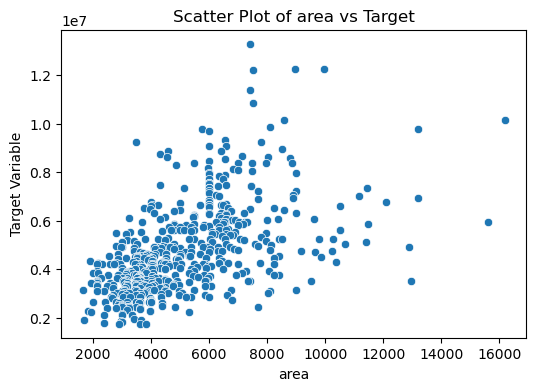

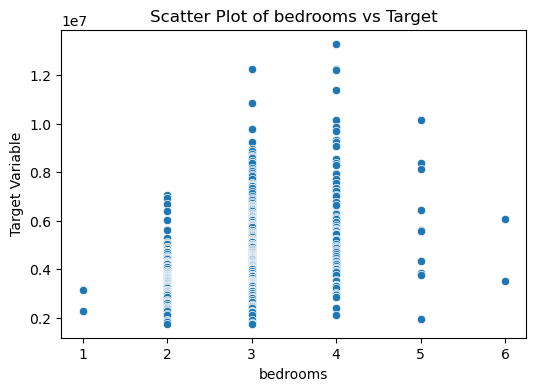

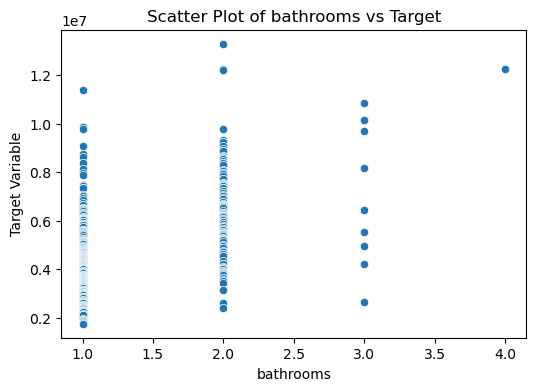

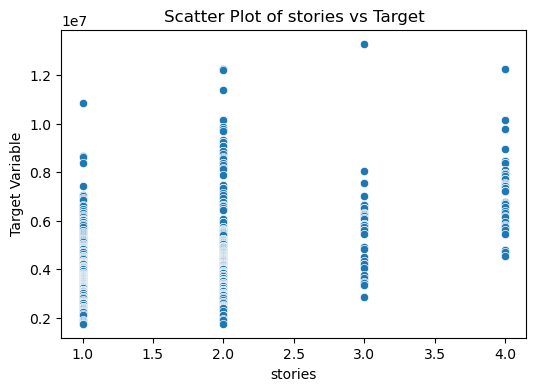

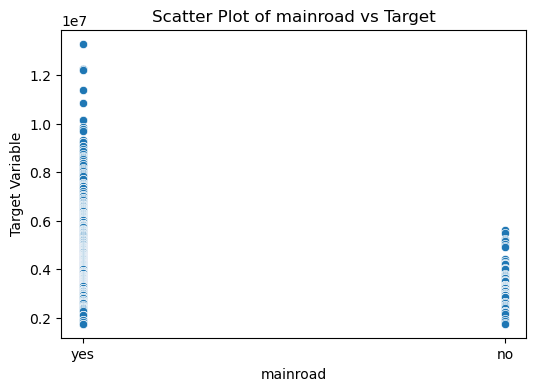

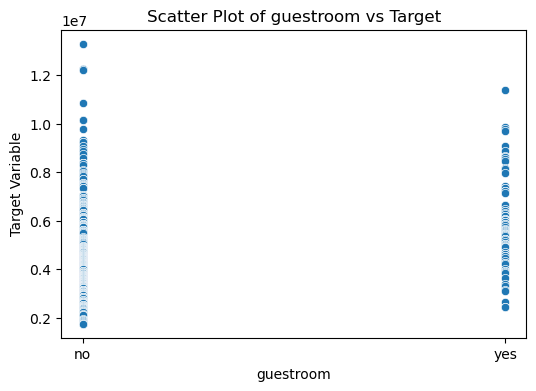

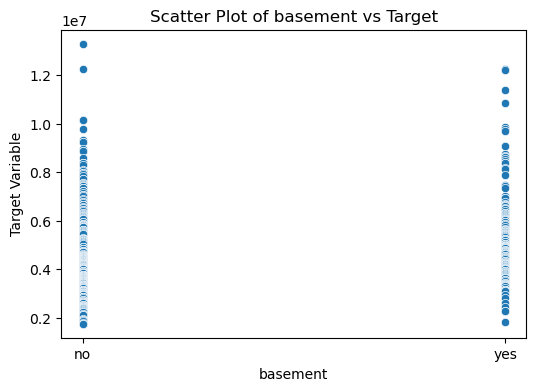

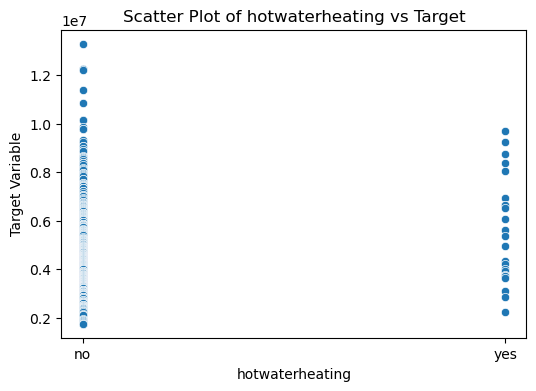

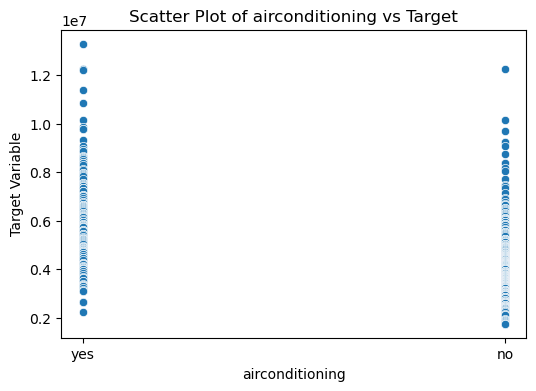

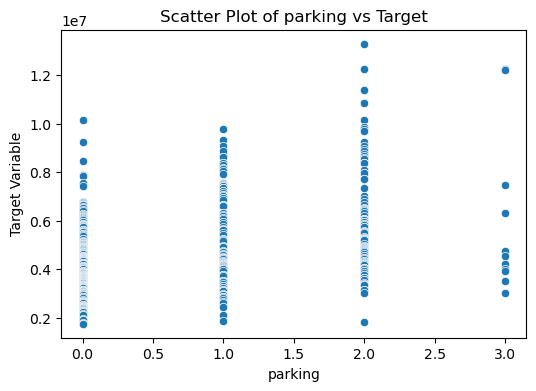

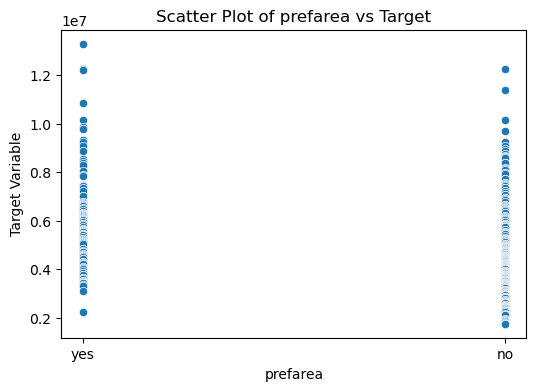

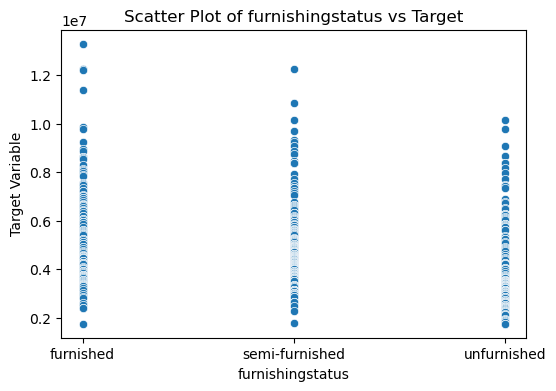

In [19]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x = df.drop(columns = ['price'])

y = df['price']

for i in x.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x[i],y=y)
    plt.xlabel(i)
    plt.ylabel("Target Variable")
    plt.title(f"Scatter Plot of {i} vs Target")
    plt.show()

In [20]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
x.iloc[:, 0] = labelencoder_X.fit_transform(x.iloc[:, 0])
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
data = df.select_dtypes(include = ['object'])
data

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [21]:
# from sklearn.preprocessing import LabelEncoder

# # Instantiate the LabelEncoder
# encoder = LabelEncoder()
# data = df.select_dtypes(include=['object'])

# data.iloc[:,0]= encoder.fit_transform(data.iloc[:,0])
# data.iloc[:,1]= encoder.fit_transform(data.iloc[:,1])
# data.iloc[:,2]= encoder.fit_transform(data.iloc[:,2])
# data.iloc[:,3]= encoder.fit_transform(data.iloc[:,3])
# data.iloc[:,4]= encoder.fit_transform(data.iloc[:,4])
# data.iloc[:,5]= encoder.fit_transform(data.iloc[:,5])
# data.iloc[:,6]= encoder.fit_transform(data.iloc[:,6])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_data = df.select_dtypes(include=['object'])
for col in categorical_data.columns:
    df[col] = encoder.fit_transform(df[col])

In [22]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [23]:

#8  Avoiding the Dummy Variable Trap

# df_encoded = pd.get_dummies(df, columns=['furnishingstatus'])---> here we are performing one-hotencoding and removing one col such as furnishingstatus
# df_encoded

#df = pd.get_dummies(df,drop_first = True)
#df

# One-Hot Encode categorical variables (drop_first=True avoids dummy variable trap)
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)


NameError: name 'train_test_split' is not defined

In [ ]:
#9 Apply feature scaling on numerical variables

#scaling not required linear regresion


In [ ]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42)

In [ ]:
#11 Fitting Multiple Linear Regression to the Training

# from sklearn.linear_model import LinearRegression
# model =LinearRegression()
# model.fit(x_train,y_train)



In [ ]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred = model.predict(x_test)  # train set prediction
err = y_pred - y_test.to_numpy()  # compare with train labels
err

In [ ]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=err, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot - Train Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
sns.residplot(x =y_pred,y=err,lowess=True,line_kws={'color':'red'})

In [ ]:
#14  Predic on the test set
y_pred1 =model.predict(x_test)

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
err = y_pred1 -y_test
sns.residplot(x = y_pred1,y = err,lowess=True)

In [ ]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print(mse)
print(r2)

In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
n = x_test.shape[0]  # number of samples
p = x_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R² Score: {adjusted_r2}")